# Plot generator

This notebook is meant to provide the code necessary to build the plots contained in the Master's thesis. Therefore, rather than focusing on the production of the data and the model specs (extensively explained in `main.ipynb`), here we concentrate on reproducing all the plots in the thesis using proper data.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Sec. 6.1
## Fig. 6.5

In [54]:
steps_ahead = 21

In [55]:
train_predictions = np.load(f'./results/train_pred_{steps_ahead}.npy')
train_label = np.load(f'./results/train_label_{steps_ahead}.npy')

In [56]:
train_predictions.shape

(8196, 21)

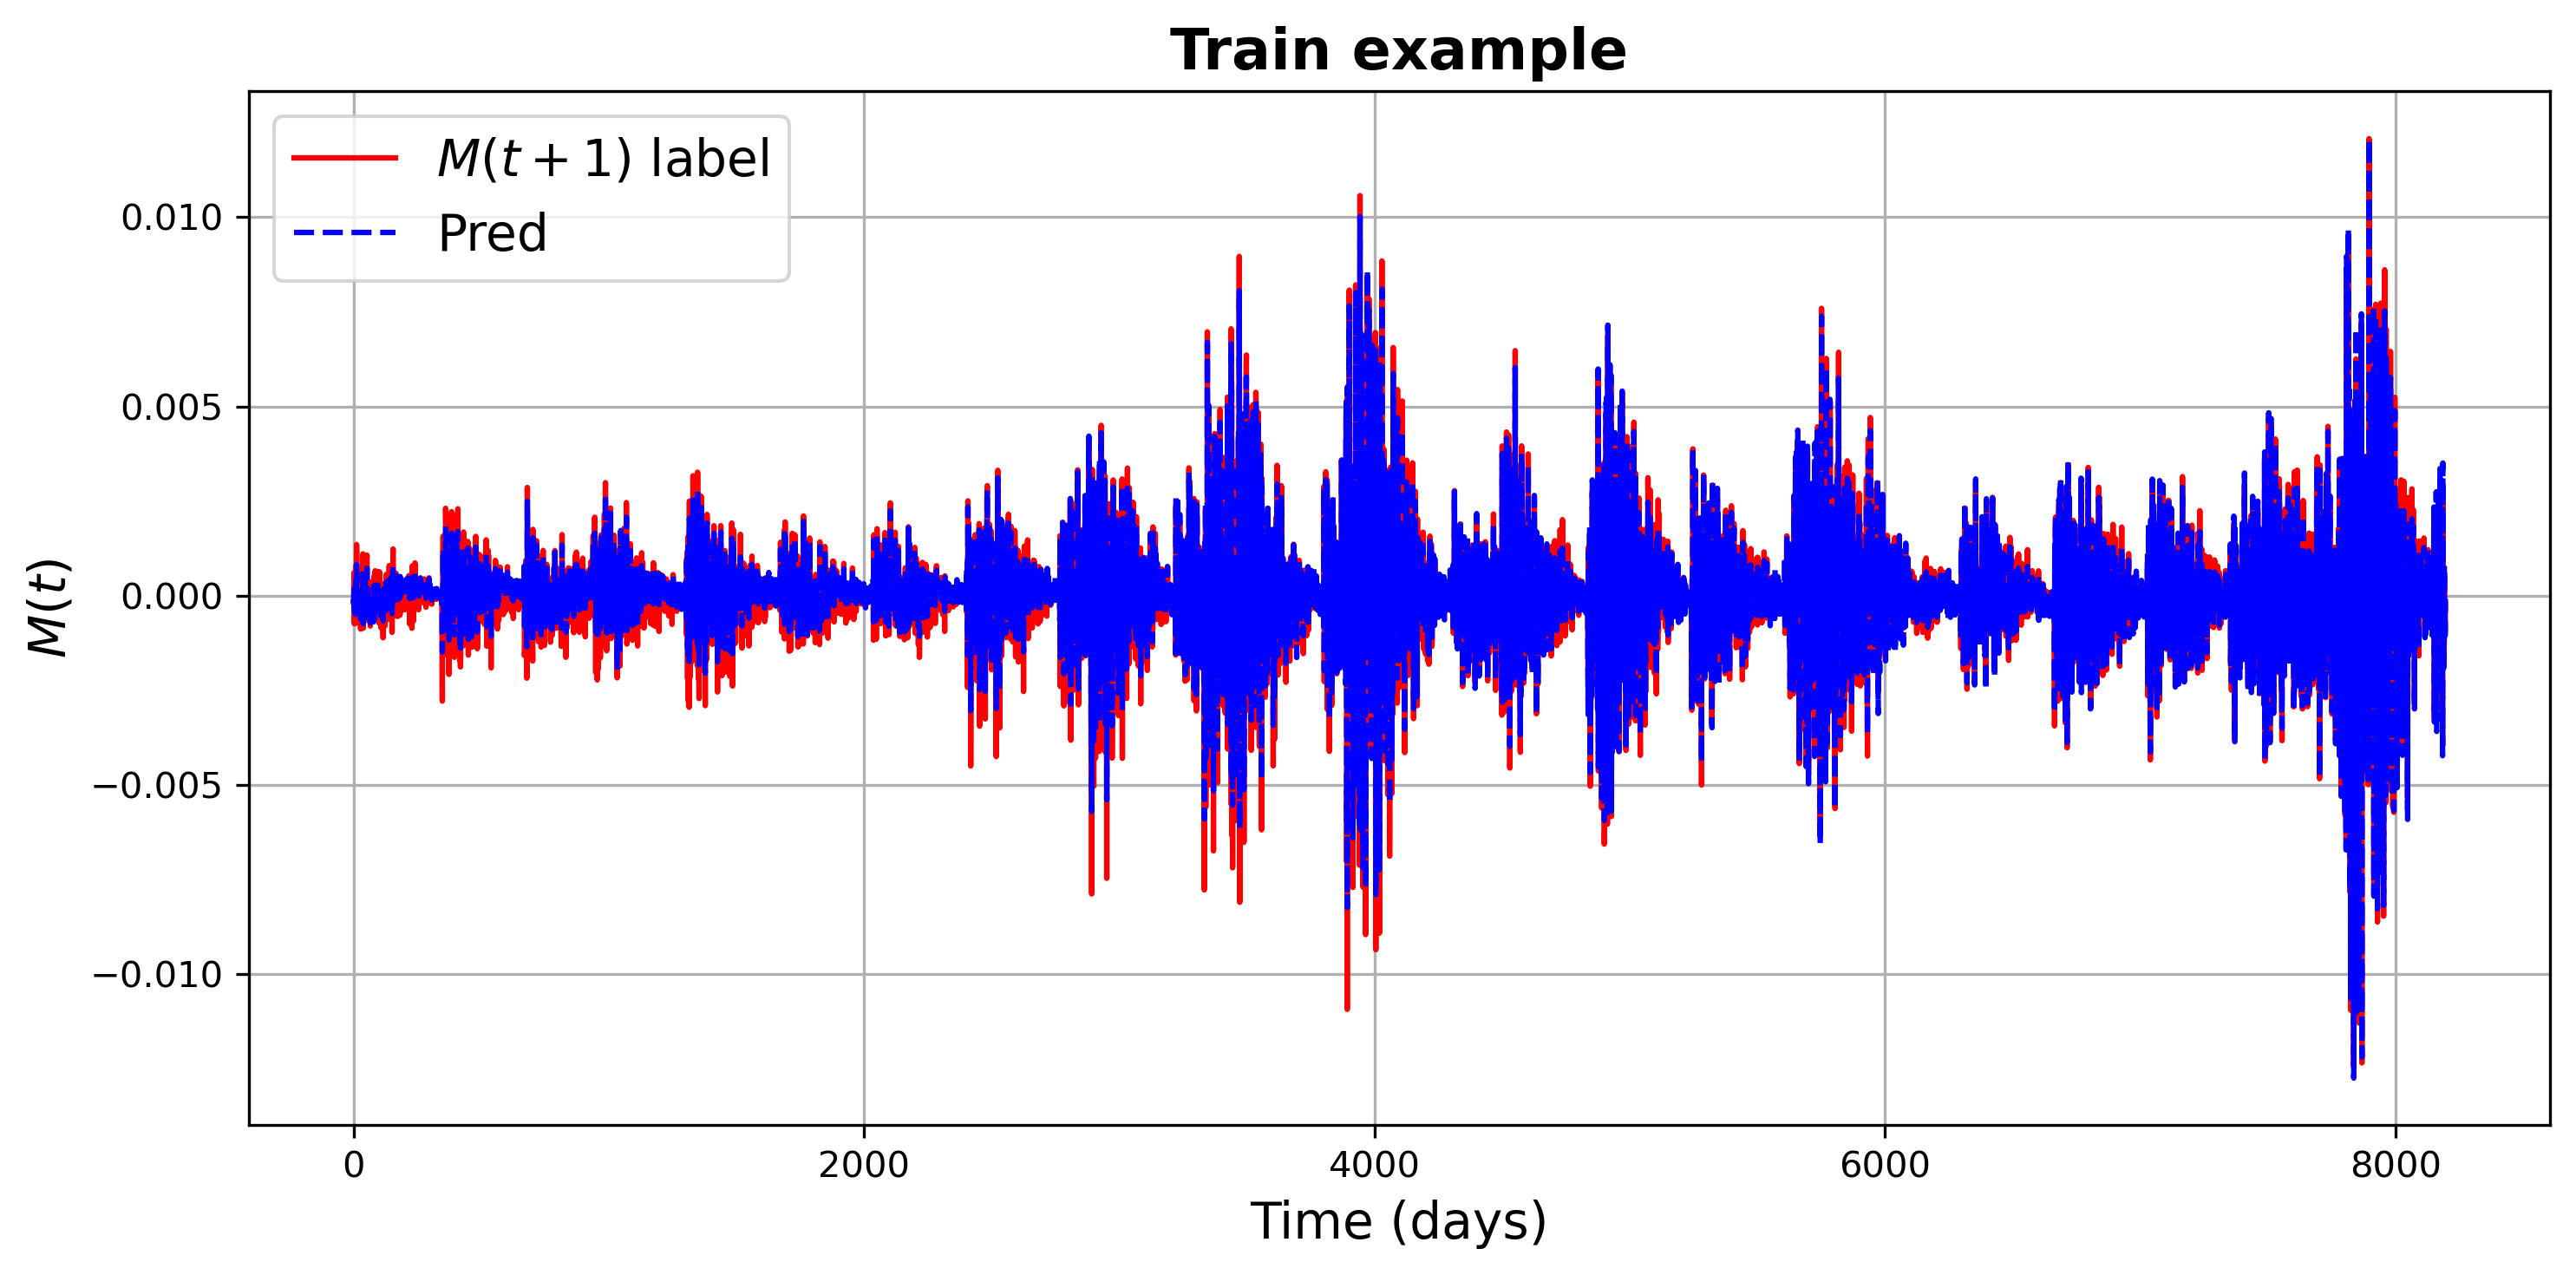

In [57]:
#Plot predictions (train)
plt.figure(figsize=(10,5), dpi=300)

plt.plot(train_label[:,0], 'r-', label='$M(t+1)$ label')
plt.plot(train_predictions[:,0], 'b--', label='Pred')
#plt.xlim(2200,2500)
#plt.ylim(-0.003,0.003)
plt.grid()
plt.legend(fontsize=14)
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('$M(t)$', fontsize=14)
plt.title('Train example', fontsize=16, fontweight='bold')
#plt.savefig('Train_example_margin_multiple_contracts_with_lambda.pdf')
plt.tight_layout()
plt.show()

## Fig 6.6

In [58]:
test_predictions = np.load(f'./results/test_pred_{steps_ahead}.npy')
test_label = np.load(f'./results/test_label_{steps_ahead}.npy')

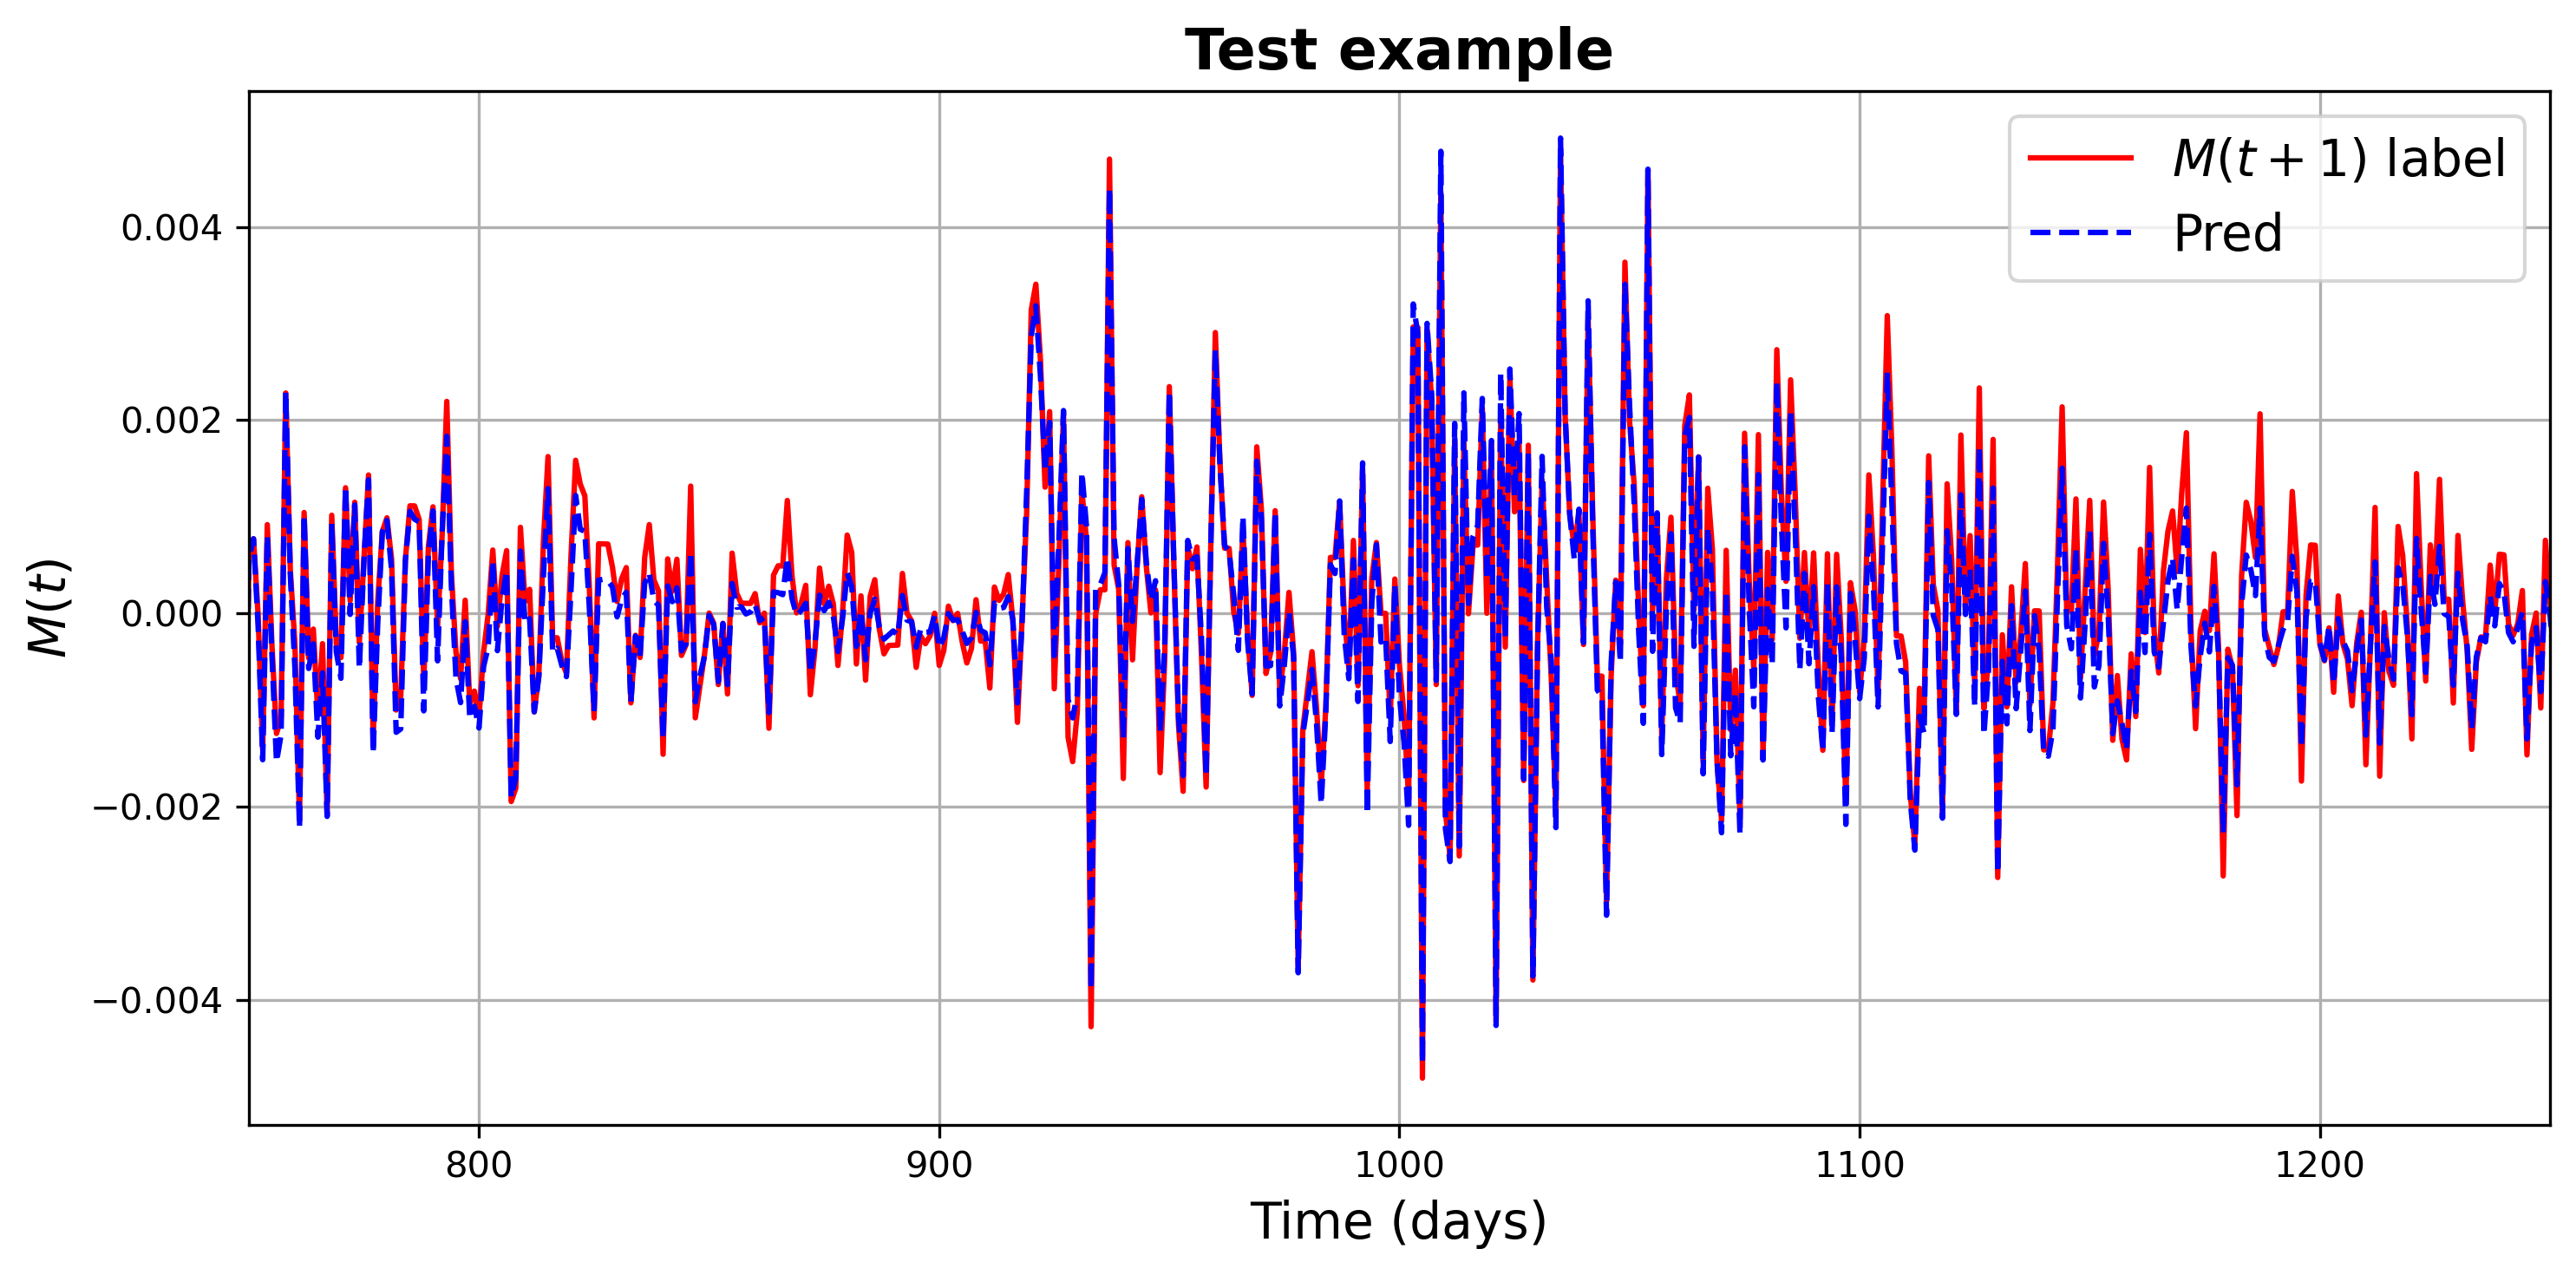

In [60]:
#Plot predictions (train)
plt.figure(figsize=(10,5), dpi=300)

plt.plot(test_label[:,0], 'r-', label='$M(t+1)$ label')
plt.plot(test_predictions[:,0], 'b--', label='Pred')
plt.xlim(750,1250)
#plt.ylim(-0.003,0.003)
plt.grid()
plt.legend(fontsize=14)
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('$M(t)$', fontsize=14)
plt.title('Test example', fontsize=16, fontweight='bold')
#plt.savefig('Train_example_margin_multiple_contracts_with_lambda.pdf')
plt.tight_layout()
plt.show()

## Fig. 6.7

- TO DO, DA RIVEDERE BENE TEST_PRED_1_NODE.py per fare cond-no/cond

## Sec. 6.2
### Fig. 6.8

**Qui manca da fare l'actual calcolo di means_100 stds_100**

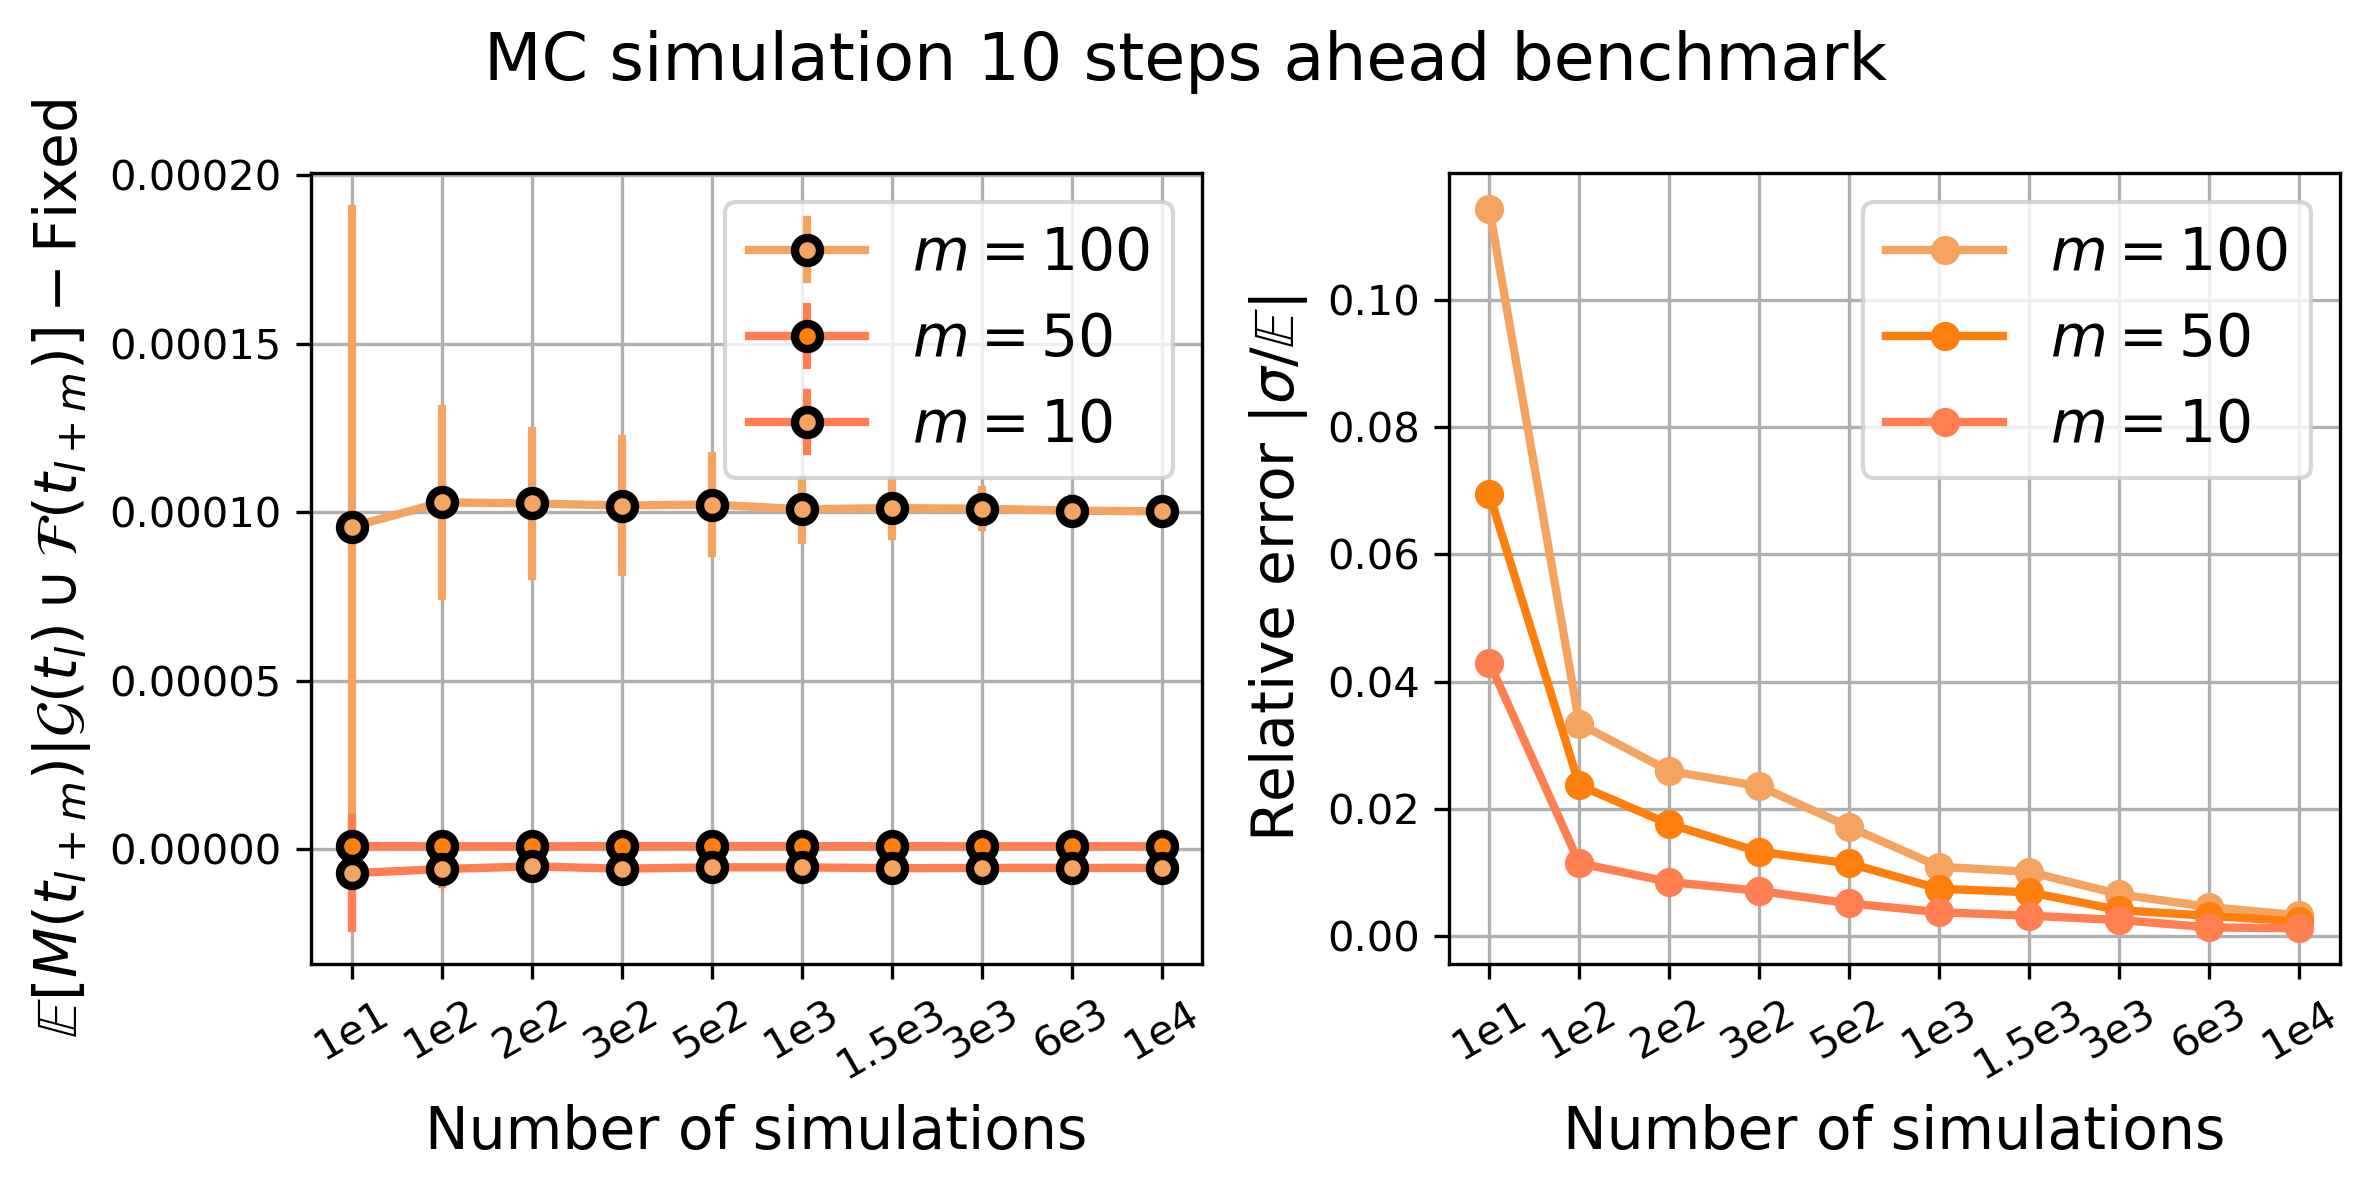

In [100]:
plt.figure(figsize=(8,4), dpi=300)
plt.subplot(1,2,1)
plt.suptitle('MC simulation 10 steps ahead benchmark', fontsize=16)
plt.errorbar(x= np.arange(len(means_100)), y=means_100 -  ProvideFixedPart(1700, 100, contracts, sim), yerr=stds_100, fmt='o-', elinewidth=2, capsize=1, mec='k', mew='2', mfc='sandybrown', color='sandybrown', lw=2, label='$m=100$')
plt.errorbar(x= np.arange(len(means_50)), y=means_50 - ProvideFixedPart(1700, 50, contracts, sim), yerr=stds_50, fmt='o-', elinewidth=2, capsize=1, mec='k', mew='2', mfc='tab:orange', color='coral', lw=2, label='$m=50$')
plt.errorbar(x= np.arange(len(means_10)), y=means_10 -  ProvideFixedPart(1700, 10, contracts, sim), yerr=stds_10, fmt='o-', elinewidth=2, capsize=1, mec='k', mew='2', mfc='sandybrown', color='coral', lw=2, label='$m=10$')
plt.legend(fontsize=14)
plt.xticks([0, 1, 2, 3,4,5,6,7,8,9], ['1e1', '1e2', '2e2', '3e2', '5e2', '1e3', '1.5e3', '3e3', '6e3', '1e4'], rotation=30)
plt.xlabel('Number of simulations', fontsize=14)
plt.ylabel('$\mathbb{E}[M(t_{l+m}) | \mathcal{G}(t_{l}) \cup \mathcal{F}(t_{l+m})] -$Fixed', fontsize=14)
plt.grid()
plt.tight_layout()

plt.subplot(1,2,2)
plt.plot(abs(np.asarray(stds_100)/np.asarray(means_100)), 'o-', color='sandybrown', lw=2, label='$m=100$')
plt.plot(abs(np.asarray(stds_50)/np.asarray(means_50)), 'o-', color='tab:orange', lw=2, label='$m=50$')
plt.plot(abs(np.asarray(stds_10)/np.asarray(means_10)), 'o-', color='coral', lw=2, label='$m=10$')
plt.legend(fontsize=14)
plt.xticks([0, 1, 2, 3,4,5,6,7,8,9], ['1e1', '1e2', '2e2', '3e2', '5e2', '1e3', '1.5e3', '3e3', '6e3', '1e4'], rotation=30)
plt.xlabel('Number of simulations', fontsize=14)
plt.ylabel('Relative error $|\sigma / \mathbb{E}|$', fontsize=14)
plt.grid()
plt.tight_layout()

#plt.savefig('MC_benchmark.pdf')
plt.show()

### Fig 6.9

In [7]:
#The results with steps_ahead 21 contain all the in-between situations and were obtained with the best fitted model.
steps_ahead=21
test_margin_predictions = np.load(f'./results/test_pred_{steps_ahead}.npy')
test_margin_labels = np.load(f'./results/test_label_{steps_ahead}.npy')
test_benchmark = np.load(f'./results/test_benchmark_{steps_ahead}.npy')

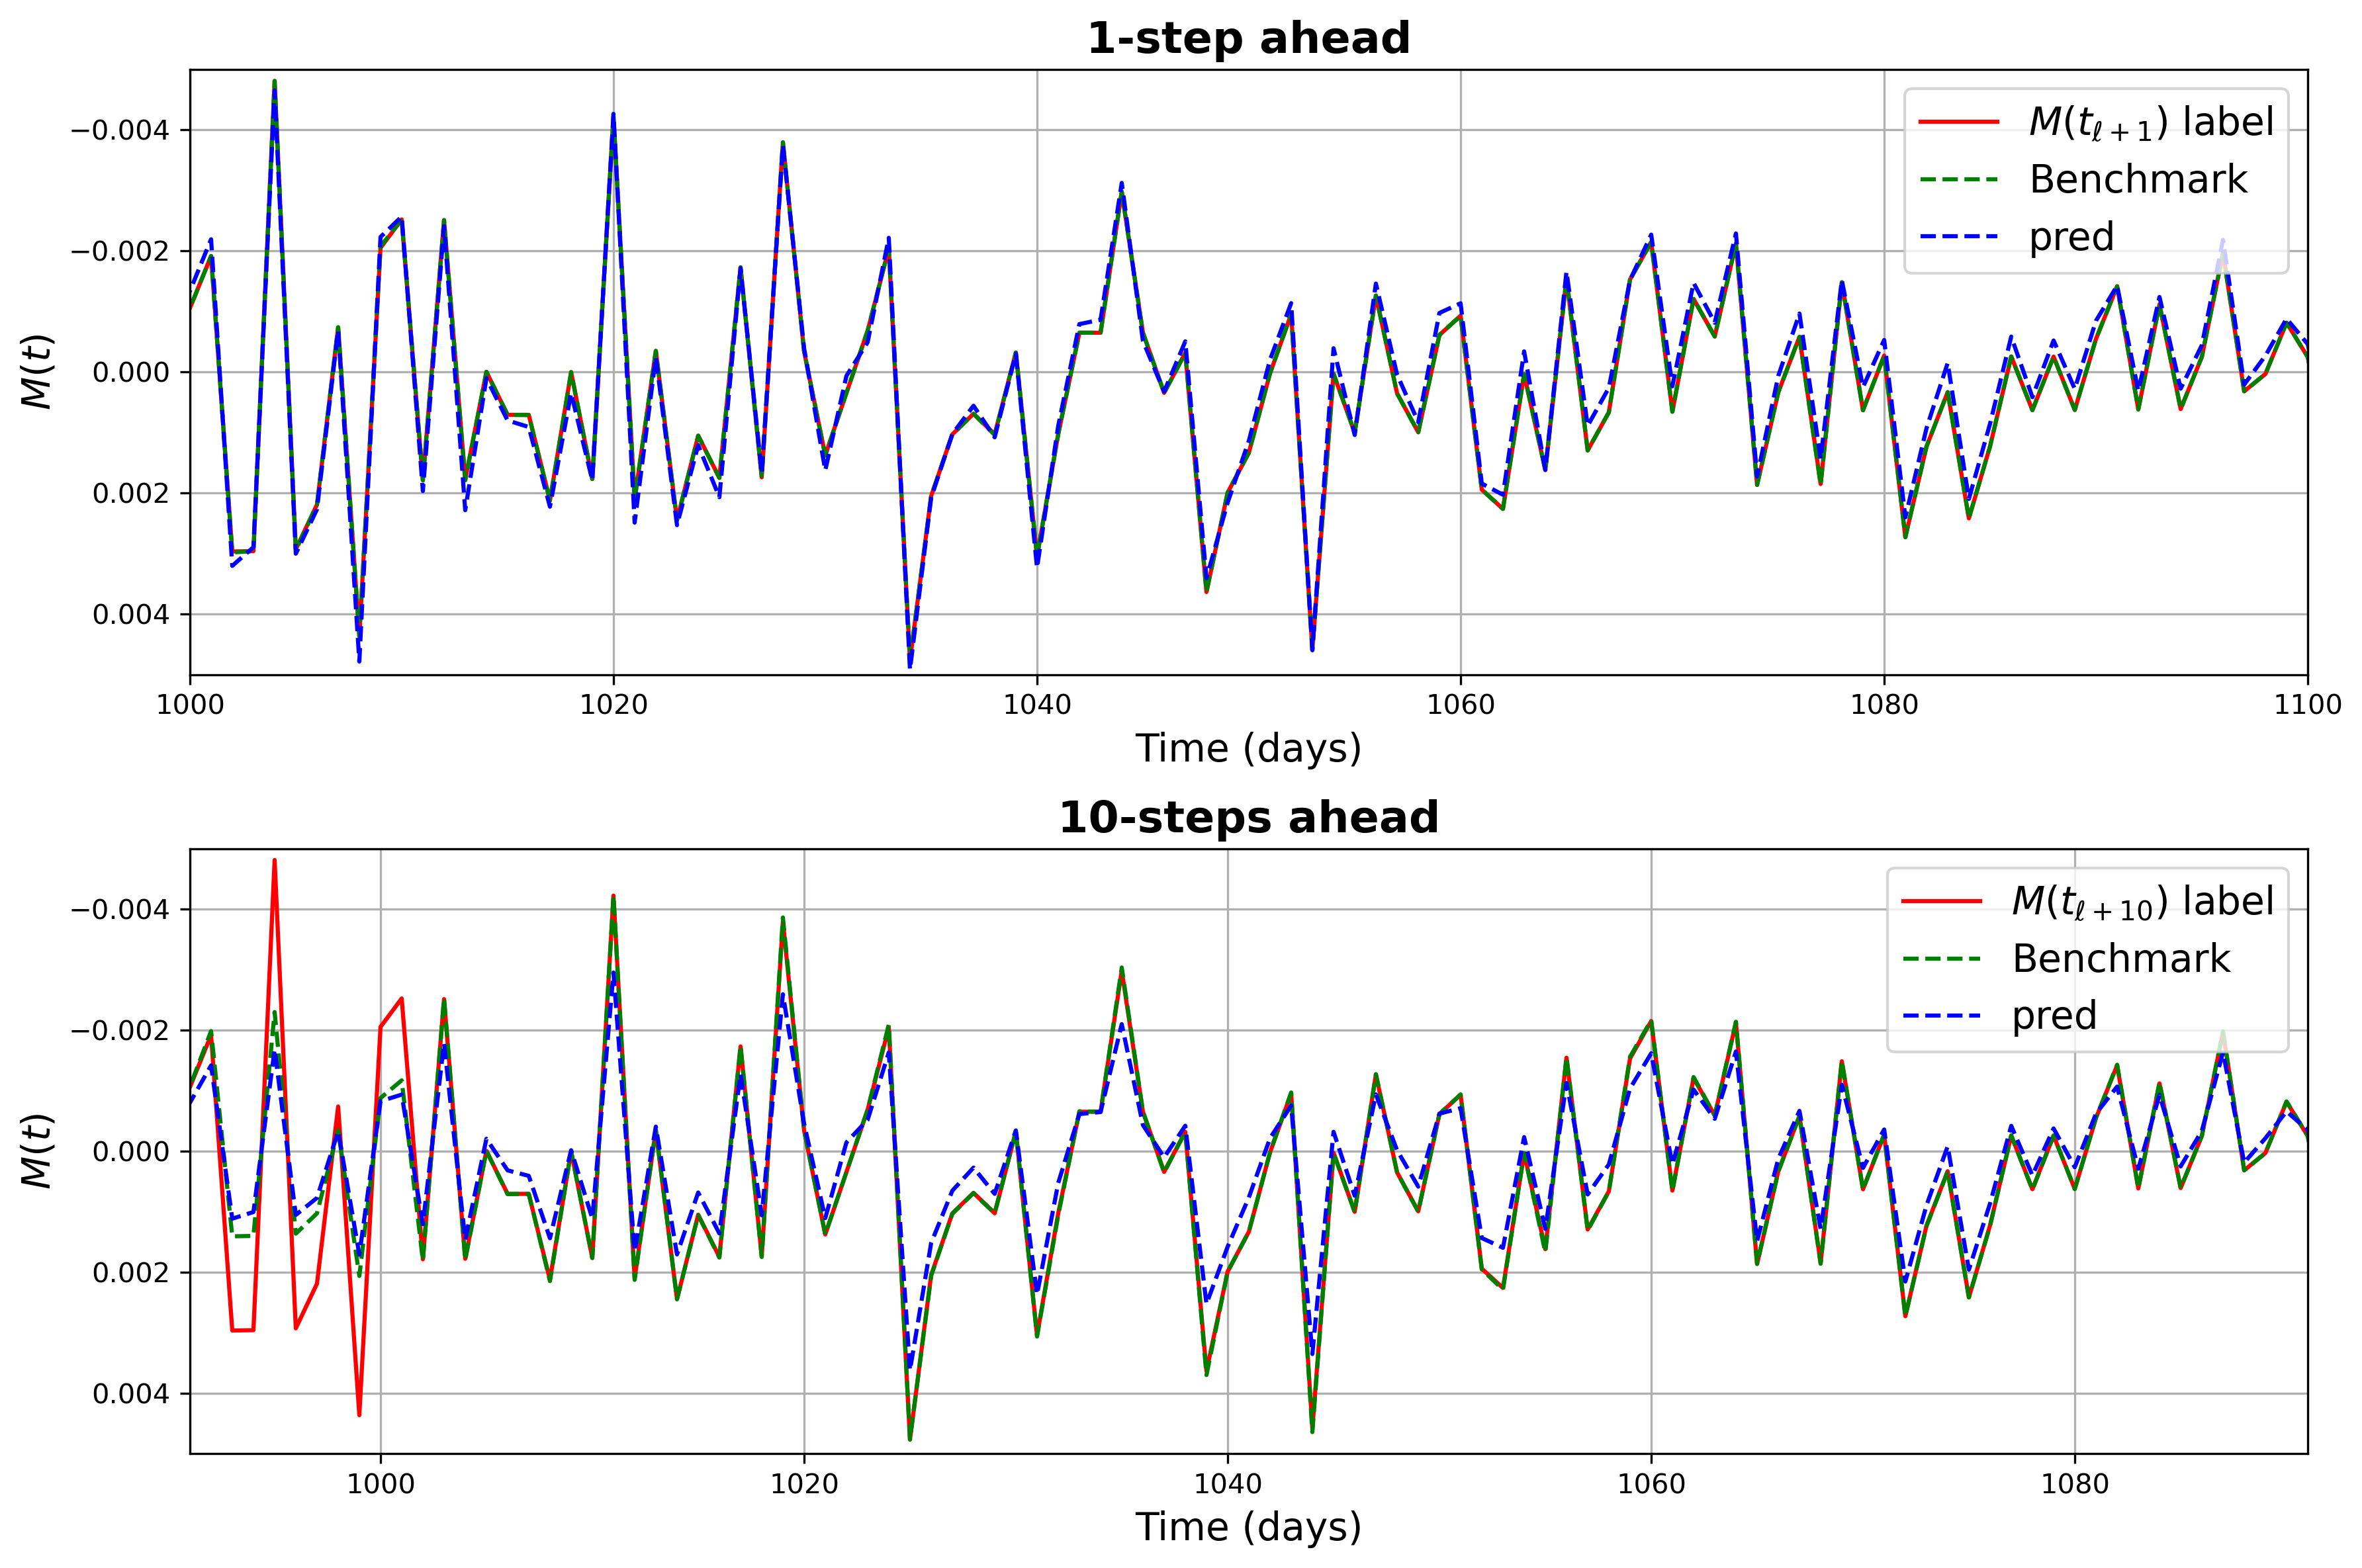

In [62]:
# Plot predictions (train)
plt.figure(figsize=(12, 8), dpi=300)

plt.subplot(2,1,1)
# Second subplot (smaller, on the right)
plt.plot(test_margin_labels[1:, 0], 'r-', label='$M(t_{\ell+1})$ label')
plt.plot(test_benchmark[:, 0], 'g--', label='Benchmark')
plt.plot(test_margin_predictions[1:, 0], 'b--', label='pred')
plt.xlim(1000,1100)
plt.ylim(0.005,-0.005)
plt.grid()
plt.legend(fontsize=14)
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('$M(t)$', fontsize=14)
plt.title('1-step ahead', fontsize=16, fontweight='bold')


# Fourth subplot (smaller, on the right)
plt.subplot(2,1,2)
plt.plot(test_margin_labels[1:, 9], 'r-', label='$M(t_{\ell+10})$ label')
plt.plot(test_benchmark[:, 9], 'g--', label='Benchmark')
plt.plot(test_margin_predictions[1:, 9], 'b--', label='pred')
plt.xlim(991,1091)
plt.ylim(0.005,-0.005)
plt.grid()
plt.legend(fontsize=14)
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('$M(t)$', fontsize=14)
plt.title('10-steps ahead', fontsize=16, fontweight='bold')

plt.tight_layout()
#plt.savefig('1_step_10_steps.pdf')
plt.show()


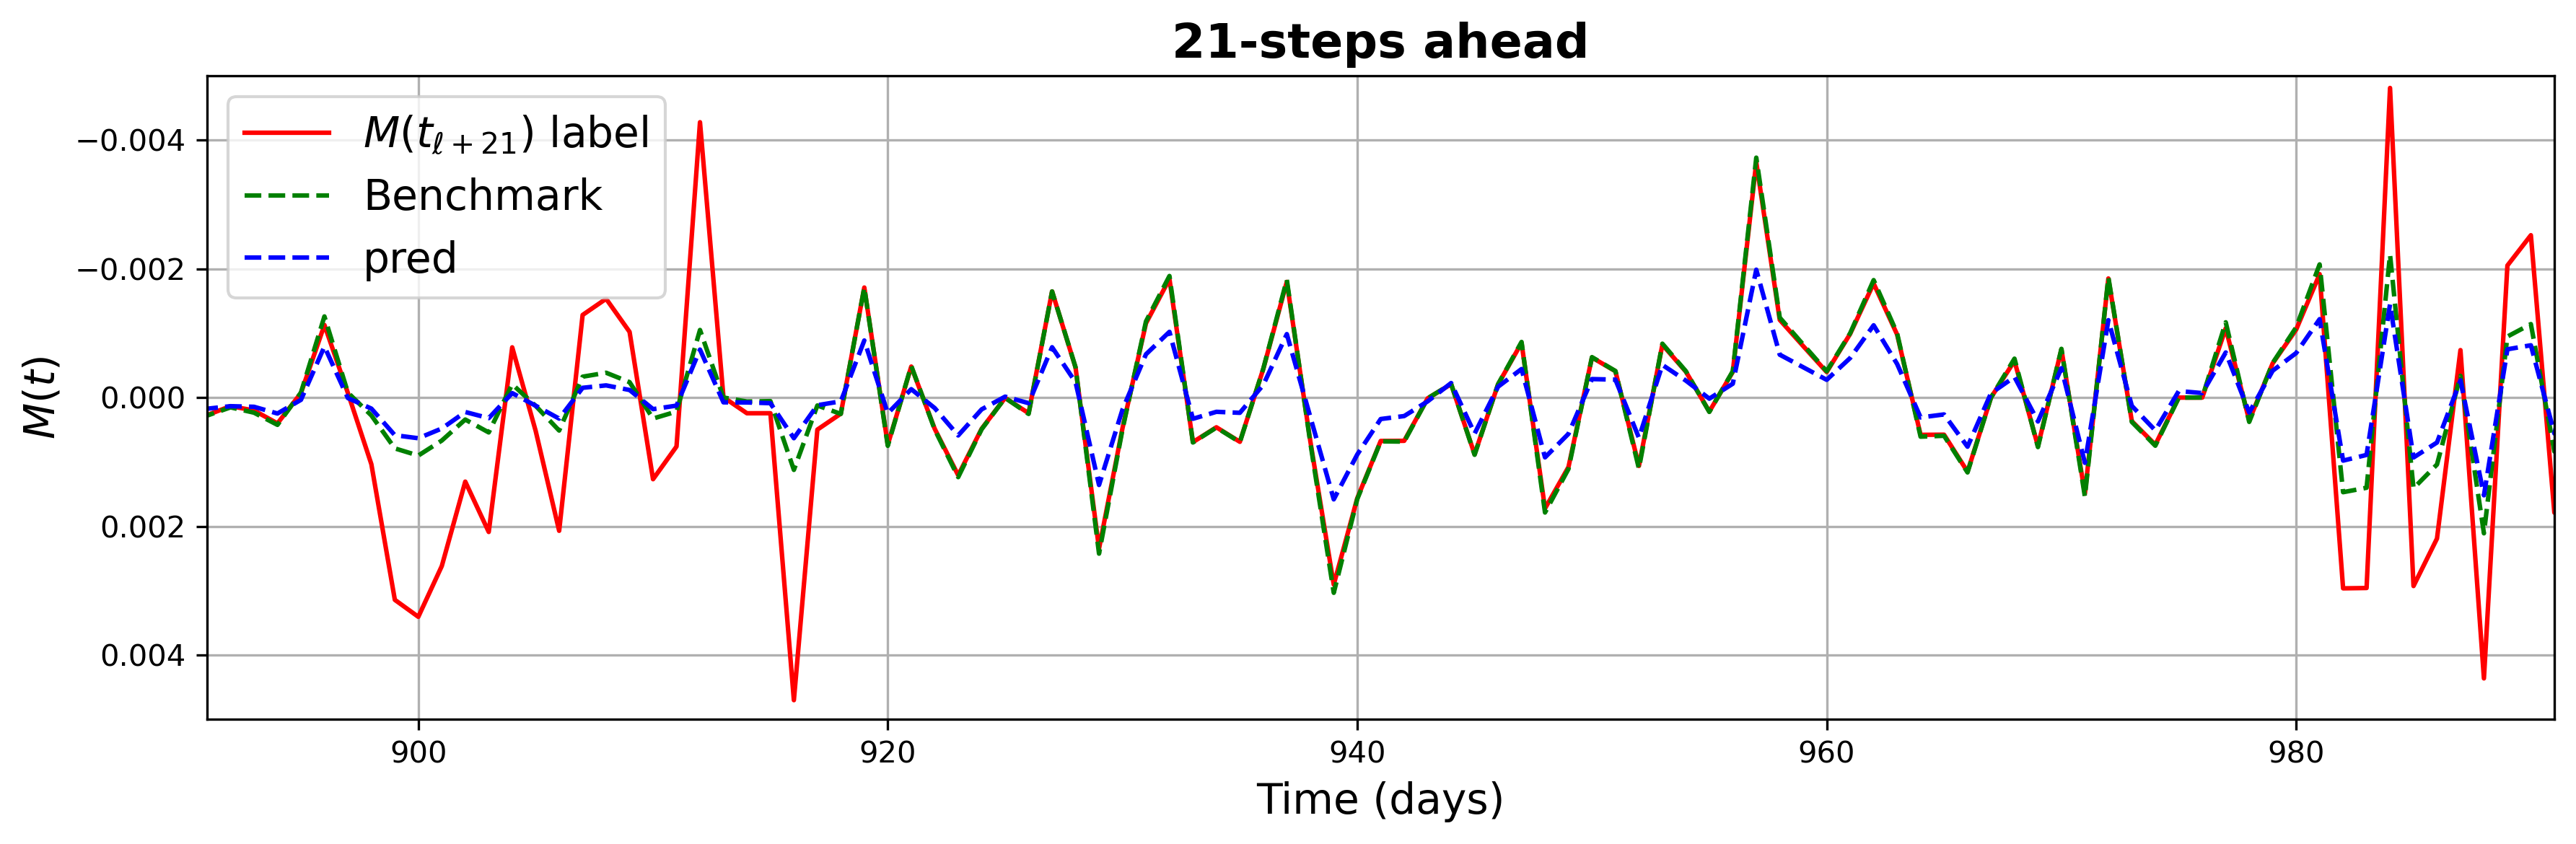

In [63]:
plt.figure(figsize=(12, 4), dpi=300)

# Fourth subplot (smaller, on the right)
plt.plot(test_margin_labels[1:, 20], 'r-', label='$M(t_{\ell+21})$ label')
plt.plot(test_benchmark[:, 20], 'g--', label='Benchmark')
plt.plot(test_margin_predictions[1:, 20], 'b--', label='pred')
plt.xlim(891,991)
plt.ylim(0.005,-0.005)
plt.grid()
plt.legend(fontsize=14)
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('$M(t)$', fontsize=14)
plt.title('21-steps ahead', fontsize=16, fontweight='bold')

plt.tight_layout()
#plt.savefig('21_steps_ahead.pdf')
plt.show()

In [1]:
import torch
import torch.nn as nn

In [23]:
pred_mse_test = []
bench_mse_test = []
criterion = nn.MSELoss()

for step in range(test_margin_predictions.shape[1]):
    
    pred_mse_test.append(criterion(torch.tensor(test_margin_predictions[1:,step]), torch.tensor(test_margin_labels[1:,step])))
    bench_mse_test.append(criterion(torch.tensor(test_margin_predictions[1:,step]), torch.tensor(test_benchmark[:-1, step])))


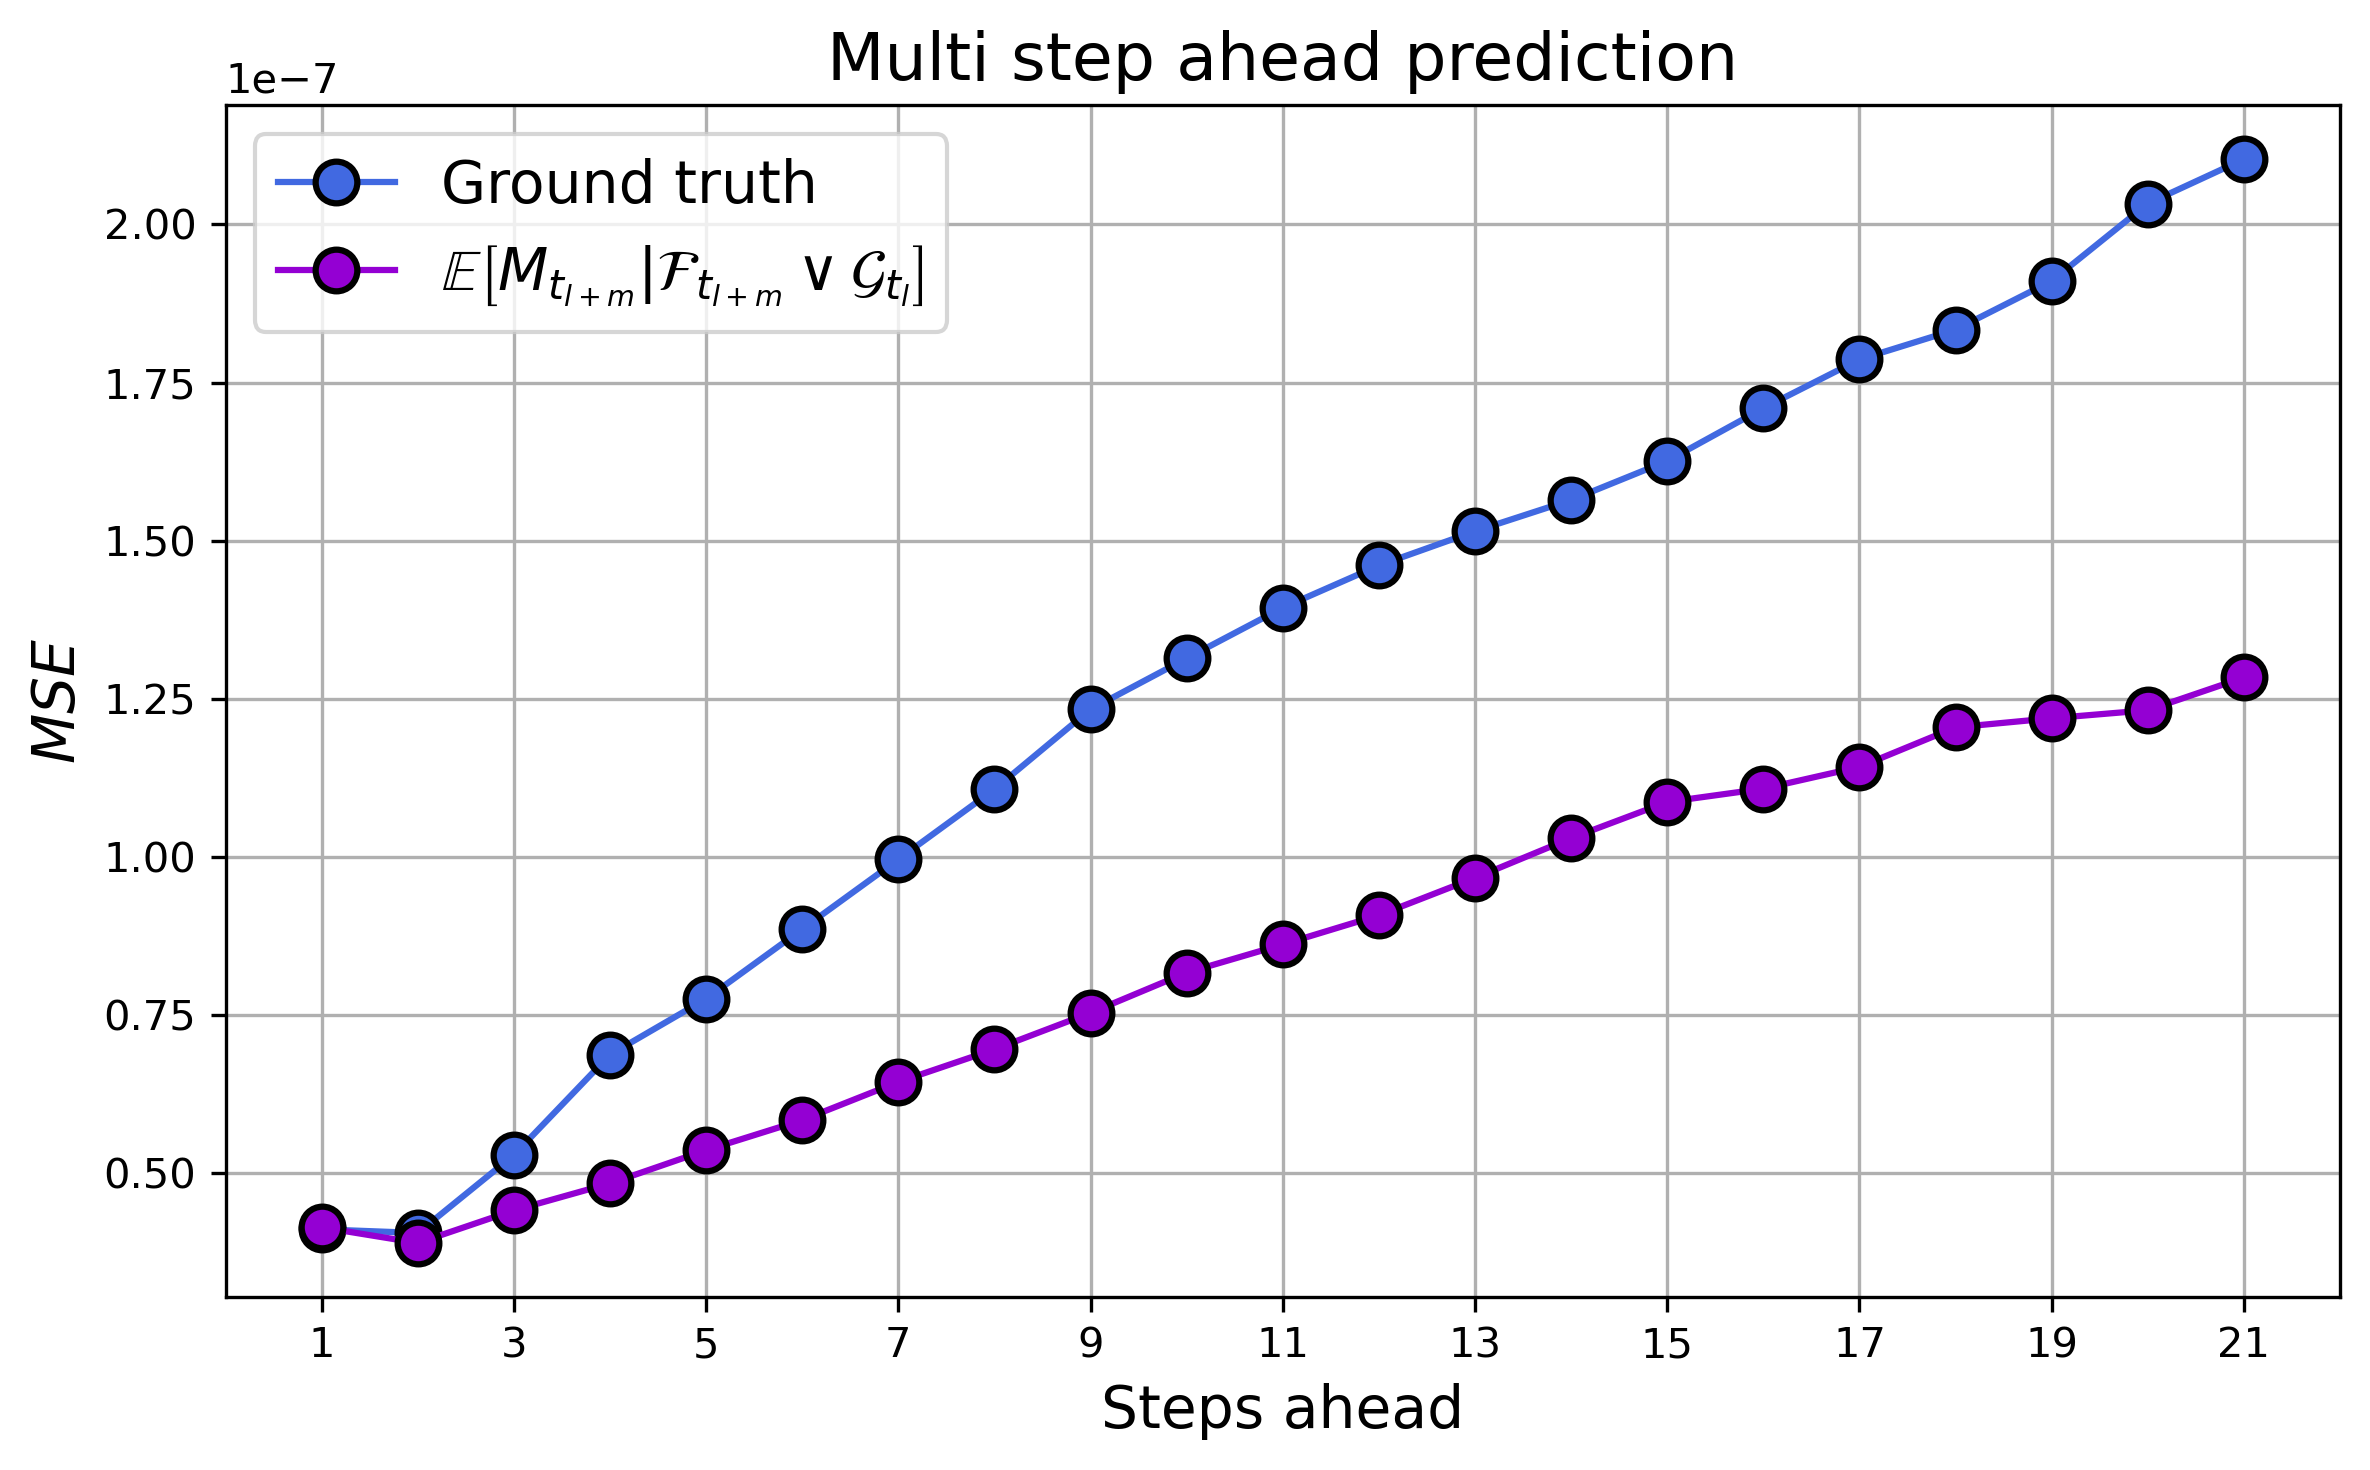

In [24]:
plt.figure(figsize=(8,5), dpi=300)
steps = np.arange(1,22)
plt.plot(steps,pred_mse_test, 'o-', c='royalblue', mec='k', mew=1.5,ms=10,  label='Ground truth')
plt.plot(steps,bench_mse_test,'o-', c='darkviolet', mec='k', mew=1.5,ms=10, label='$\mathbb{E}\left[M_{t_{l+m}} | \mathcal{F}_{t_{l+m}} \\vee \mathcal{G}_{t_{l}}  \\right]$')
plt.grid()
plt.xticks(np.arange(1,22,2))
plt.legend(fontsize=14)
plt.xlabel('Steps ahead', fontsize=14)
plt.ylabel('$MSE$', fontsize=14)
plt.title('Multi step ahead prediction', fontsize=16)
plt.tight_layout()
#plt.savefig('Multi_steps_performance.pdf')
plt.show()